# RL Basics
- Submitted by Sankalp Mittal (220963)

# Part a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_frozen_lake(size_of_lake,num_of_holes):
    n = size_of_lake
    if num_of_holes > (n*n-2):
        raise ValueError("M cannot be greater than size of the lake")

    arr = np.ones((n,n),dtype=int)
    # Remove (0,0) and (n-1,n-1) from the possible locations of the holes as this makes the game unwinnable
    valid_indices = [(i,j) for i in range(n) for j in range(n) if (i,j) not in [(0,0),(n-1,n-1)]]
    zero_indices = np.random.choice(len(valid_indices),num_of_holes,replace=False)
    for i in zero_indices:
        arr[valid_indices[i]] = 0
    return arr

Now is the function for visualizing the sample frozen lake scenario

In [13]:
def visualize_array(arr):
    n = arr.shape[0]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(np.arange(n+1), minor=True)
    ax.set_yticks(np.arange(n+1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(n):
        for j in range(n):
            if (i,j) == (0,0) or (i,j) == (n-1,n-1):
                ax.add_patch(plt.Rectangle((j, n-1-i), 1, 1, color="blue"))
                continue
            if arr[i, j] == 1:
                ax.add_patch(plt.Rectangle((j, n-1-i), 1, 1, color="black"))

    plt.show()

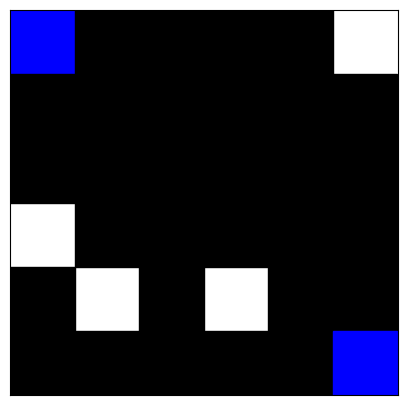

In [14]:
array = generate_frozen_lake(6,4)
visualize_array(array)

# Part b
Implement a Q-Learning agent

In [30]:
# Actions: 0 = Left, 1 = Right, 2 = Up, 3 = Down
Actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

In [31]:
def train_q_learning(env, episodes=1000, alpha=0.1, lambd=0.9):

    n = env.shape[0]
    Q = np.zeros((n, n, 4))
    rewards_per_episode = []

    for episode in range(episodes):
        x, y = 0, 0  # Start position
        total_reward = 0
        done = False

        while not done:
            action = np.argmax(Q[x, y])

            # Take action and move
            dx, dy = Actions[action]
            new_x, new_y =  x+dx, y+dy

            # Check if the agent hits a wall
            if new_x < 0 or new_x >= n or new_y < 0 or new_y >= n:
                reward = -1
                done = True
                new_x = x
                new_y = y
            # Check if agent falls into a hole
            elif env[new_x, new_y] == 0:
                reward = -1
                done = True
            elif (new_x, new_y) == (n-1, n-1):
                reward = 10  # Goal reached
                done = True
            else:
                reward = -0.1

            # Q-learning update rule
            Q[x, y, action] = alpha * (reward + lambd * np.max(Q[new_x, new_y])) + (1-alpha)* Q[x, y, action]

            x, y = new_x, new_y  # Move to next state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return Q, rewards_per_episode

This is a sample run of this Q-Learning algorithm

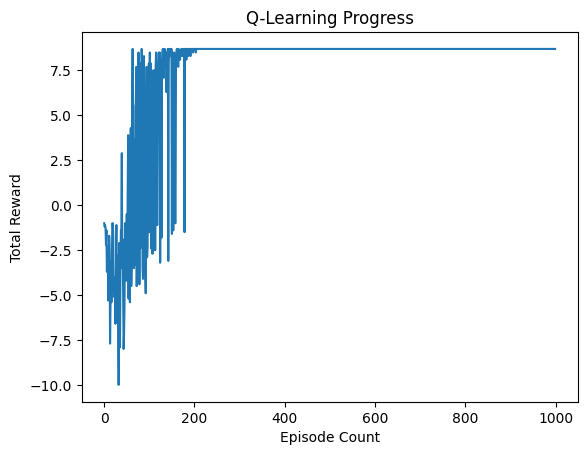

In [38]:
array = generate_frozen_lake(8,4)
Q_table, rewards = train_q_learning(array)

# Plot the table
plt.plot(range(len(rewards)), rewards)
plt.xlabel("Episode Count")
plt.ylabel("Total Reward")
plt.title("Q-Learning Progress")
plt.show()

# Part c
Tweaking the value of lambda and alpha to find how it changes

## Tracking Q-Training
This plot tracks the training progress on changing alpha and lambda

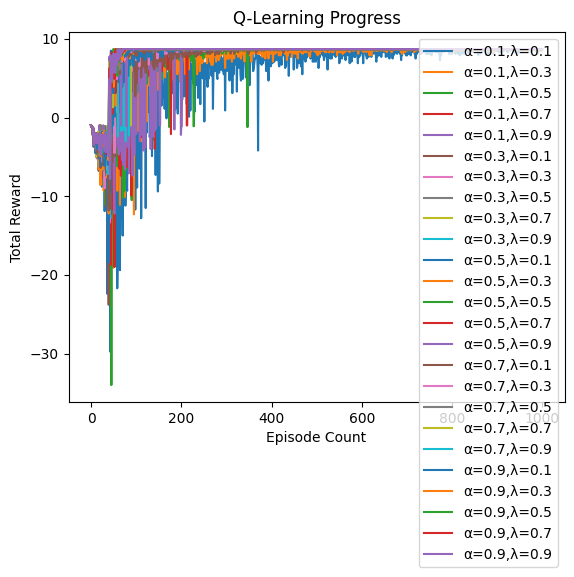

In [33]:
alpha_test_values = [0.1,0.3,0.5,0.7,0.9]
lambd_test_values = [0.1,0.3,0.5,0.7,0.9]

array = generate_frozen_lake(8,4)
# storage_arr = []
for alpha in alpha_test_values:
    for lambd in lambd_test_values:
        Q_table, rewards = train_q_learning(array,alpha=alpha,lambd=lambd)
        # storage_arr.append((rewards,alpha,lambd))
        plt.plot(rewards,label=f"α={alpha},λ={lambd}")
plt.xlabel("Episode Count")
plt.ylabel("Total Reward")
plt.title("Q-Learning Progress")
plt.legend()

## Tracking final reward value
This plot tracks the final value of the reward as we change alpha and lambda to take into account variations in reward we take the average of the last 1% of values

In [34]:
def get_last_rewards(env,alpha,lambd):
    results = train_q_learning(env,alpha=alpha,lambd=lambd)
    episodes = len(results)
    # Take average of last 1%
    final_1_percent = int(0.01 * episodes) or 1  # At least 1 episode
    avg_final_rewards = np.mean(results[-final_1_percent:])

    return avg_final_rewards

### Plot for alpha

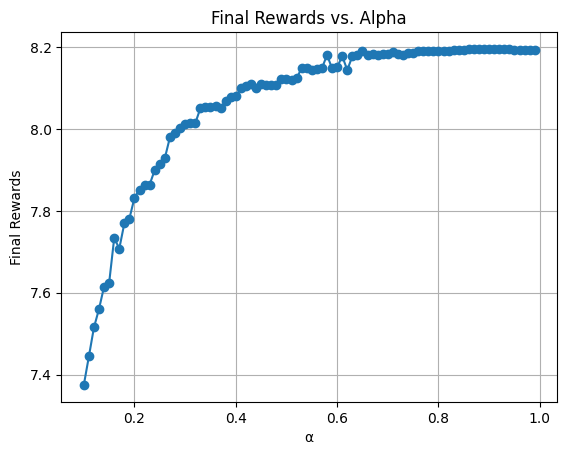

In [39]:
alpha_values = np.arange(0.1, 1.0, 0.01)
lambd = 0.9

array = generate_frozen_lake(8,4)
final_rewards = [get_last_rewards(array, alpha, lambd) for alpha in alpha_values]

plt.plot(alpha_values, final_rewards, marker='o')
plt.xlabel('α')
plt.ylabel('Final Rewards')
plt.title('Final Rewards vs. Alpha')
plt.grid(True)

### Plot for lambda

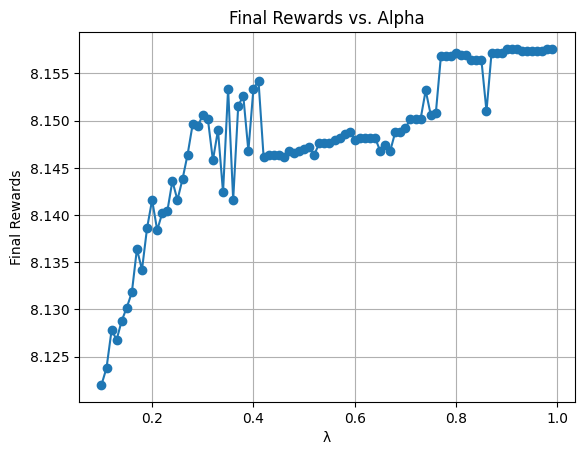

In [41]:
lambd_values = np.arange(0.1,1.0,0.01)
alpha = 0.9

array = generate_frozen_lake(8,4)
final_rewards = [get_last_rewards(array, alpha, lambd) for lambd in lambd_values]

plt.plot(lambd_values, final_rewards, marker='o')
plt.xlabel('λ')
plt.ylabel('Final Rewards')
plt.title('Final Rewards vs. Alpha')
plt.grid(True)

We can see that Q does not increase as relaibily on increasing lambda as on increasing alpha

# Part d

## Tracking Q-Training
We take possible values of m to be from 4 to n for each n we might get some occurances that are unsolvable but they should not be too much in density

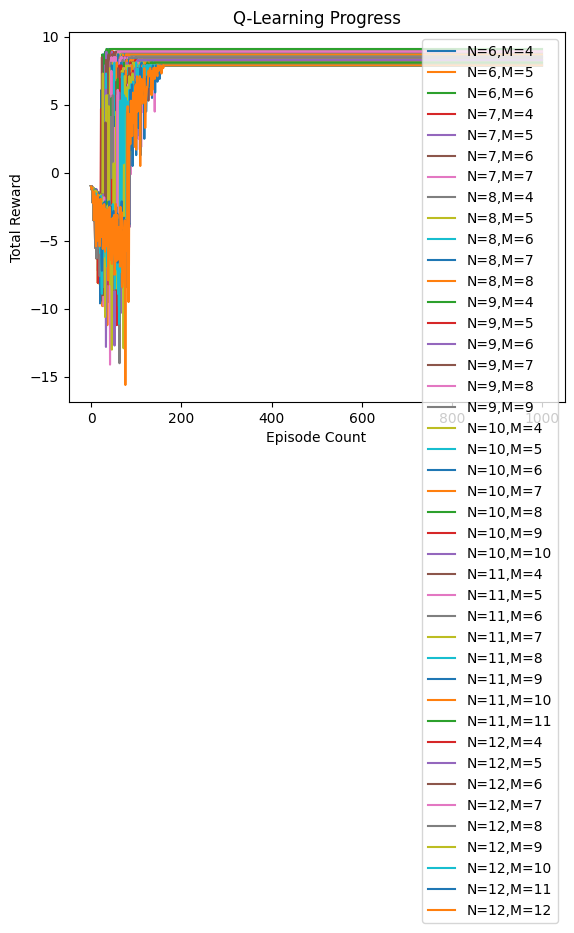

In [42]:
n_test_values = [6,7,8,9,10,11,12]

for n in n_test_values:
    for m in range(4,n+1):
        array = generate_frozen_lake(n,m)
        _,rewards = train_q_learning(array,alpha=0.9,lambd=0.9)
        plt.plot(rewards,label=f"N={n},M={m}")
plt.xlabel("Episode Count")
plt.ylabel("Total Reward")
plt.title("Q-Learning Progress")
plt.legend()

## Tracking final reward value

In [49]:
!pip install tqdm

In [50]:
from tqdm import tqdm
import time

### Plot for n
We fix m at n/4 for consistancy

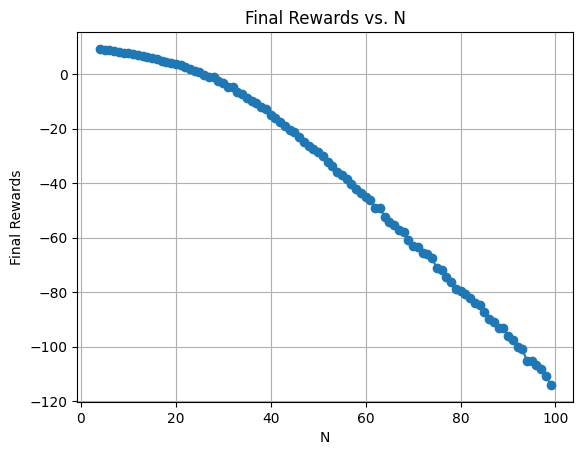

In [43]:
n_values = np.arange(4,100,1)

final_rewards = []
for n in tqdm(n_values,desc="Processing M values", unit="iterations"):
    m = int(n/4)
    array = generate_frozen_lake(n,m)
    final_rewards.append(get_last_rewards(array,alpha=0.9,lambd=0.9))

plt.plot(n_values, final_rewards, marker='o')
plt.xlabel('N')
plt.ylabel('Final Rewards')
plt.title('Final Rewards vs. N')
plt.grid(True)

Since for large n the agent will spend most of its time wandering around aimlessly final reward recieved will decrease

### Plot for m
We will choose a large n so that we have some room to work with m as we can technically choose m from 0 to $n^2 - 2$ as m increases a lot most of the possible configurations will have no possible solutions so we will choose a large n so that we do not need to increase m a lot in proportion to n

Processing M values: 100%|██████████| 396/396 [27:30<00:00,  4.17s/iterations]


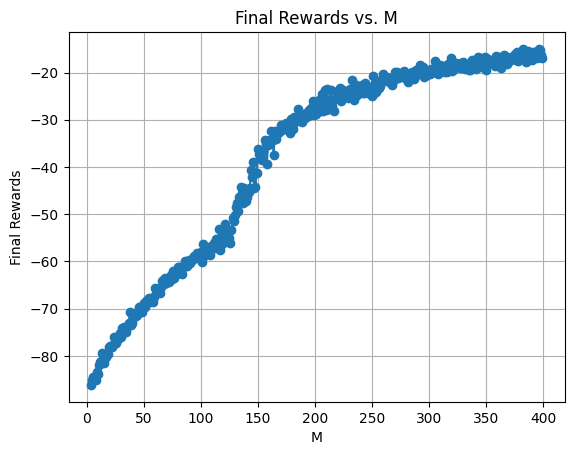

In [52]:
n = 80
m_values = np.arange(4,5*n,1)

final_rewards = []
for m in tqdm(m_values,desc="Processing M values", unit="iterations"):
    # print(m) # Just to track progress due to impatiance
    array = generate_frozen_lake(n,m)
    final_rewards.append(get_last_rewards(array,alpha=0.9,lambd=0.9))

plt.plot(m_values, final_rewards, marker='o')
plt.xlabel('M')
plt.ylabel('Final Rewards')
plt.title('Final Rewards vs. M')
plt.grid(True)

Initially the growth of the reward is linear, but after certain m it starts becoming kind of logarithmic in its shape.
<br>Disclamer: It takes a huge amount of time for the code to run as for small m and large n the agent just keeps going in random directions without actually learning anything about its environment. Also for high values of m the agent was getting stuck in some kind of loop so the code kept getting stuck.